In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('DoS_Attack_HTTP_Dataset.csv')


In [3]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.100.150-192.168.100.3-51370-80-6,192.168.100.150,51370,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003748,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
1,192.168.100.150-192.168.100.3-51368-80-6,192.168.100.150,51368,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5004214,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
2,192.168.100.150-192.168.100.3-51372-80-6,192.168.100.150,51372,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003495,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
3,192.168.100.150-192.168.100.3-51374-80-6,192.168.100.150,51374,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003215,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
4,192.168.100.150-192.168.100.3-51376-80-6,192.168.100.150,51376,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5002975,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP


In [5]:
print("Dataset Shape:", df.shape)


Dataset Shape: (52466, 86)


In [6]:

print("=== Dataset Information ===")
print(df.info())

print("\n=== Statistical Summary ===")
print(df.describe())

print("\n=== Memory Usage ===")
print(df.memory_usage(deep=True))

print("\n=== Missing Values ===")
print(df.isnull().sum())
print(df.isnull().sum().sum())  


print("\n=== Duplicate Rows ===")
print(df.duplicated().sum())

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52466 entries, 0 to 52465
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow_ID            52466 non-null  object 
 1   Src_IP             52466 non-null  object 
 2   Src_Port           52466 non-null  int64  
 3   Dst_IP             52466 non-null  object 
 4   Dst_Port           52466 non-null  int64  
 5   Protocol           52466 non-null  int64  
 6   Timestamp          52466 non-null  object 
 7   Flow_Duration      52466 non-null  int64  
 8   Tot_Fwd_Pkts       52466 non-null  int64  
 9   Tot_Bwd_Pkts       52466 non-null  int64  
 10  TotLen_Fwd_Pkts    52466 non-null  float64
 11  TotLen_Bwd_Pkts    52466 non-null  float64
 12  Fwd_Pkt_Len_Max    52466 non-null  float64
 13  Fwd_Pkt_Len_Min    52466 non-null  float64
 14  Fwd_Pkt_Len_Mean   52466 non-null  float64
 15  Fwd_Pkt_Len_Std    52466 non-null  float64

In [7]:


# Display unique values in each column
print("\nUnique values in each column:")
for column in df.columns:
    print(f"\n{column}:", df[column].nunique())


Unique values in each column:

Flow_ID: 28587

Src_IP: 14

Src_Port: 13633

Dst_IP: 28

Dst_Port: 1428

Protocol: 3

Timestamp: 893

Flow_Duration: 50234

Tot_Fwd_Pkts: 117

Tot_Bwd_Pkts: 52

TotLen_Fwd_Pkts: 1534

TotLen_Bwd_Pkts: 222

Fwd_Pkt_Len_Max: 566

Fwd_Pkt_Len_Min: 17

Fwd_Pkt_Len_Mean: 2050

Fwd_Pkt_Len_Std: 2440

Bwd_Pkt_Len_Max: 155

Bwd_Pkt_Len_Min: 83

Bwd_Pkt_Len_Mean: 255

Bwd_Pkt_Len_Std: 184

Flow_Byts/s: 29620

Flow_Pkts/s: 50479

Flow_IAT_Mean: 50991

Flow_IAT_Std: 29806

Flow_IAT_Max: 47781

Flow_IAT_Min: 22807

Fwd_IAT_Tot: 25320

Fwd_IAT_Mean: 25358

Bwd_IAT_Mean: 27134

Fwd_IAT_Max: 25187

Fwd_IAT_Min: 723

Bwd_IAT_Tot: 27130

Fwd_IAT_Std: 25274

Bwd_IAT_Std: 28186

Bwd_IAT_Max: 24943

Bwd_IAT_Min: 1394

Fwd_PSH_Flags: 1

Bwd_PSH_Flags: 2

Fwd_URG_Flags: 1

Bwd_URG_Flags: 1

Fwd_Header_Len: 195

Bwd_Header_Len: 97

Fwd_Pkts/s: 49865

Bwd_Pkts/s: 50435

Pkt_Len_Min: 17

Pkt_Len_Max: 523

Pkt_Len_Mean: 3327

Pkt_Len_Std: 3565

Pkt_Len_Var: 3576

FIN_Flag_Cnt: 2


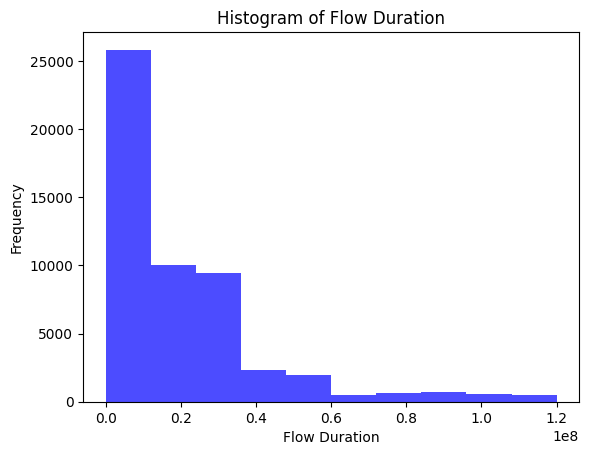

In [8]:
# Histogram of a numerical feature
plt.hist(df['Flow_Duration'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Duration')
plt.show()

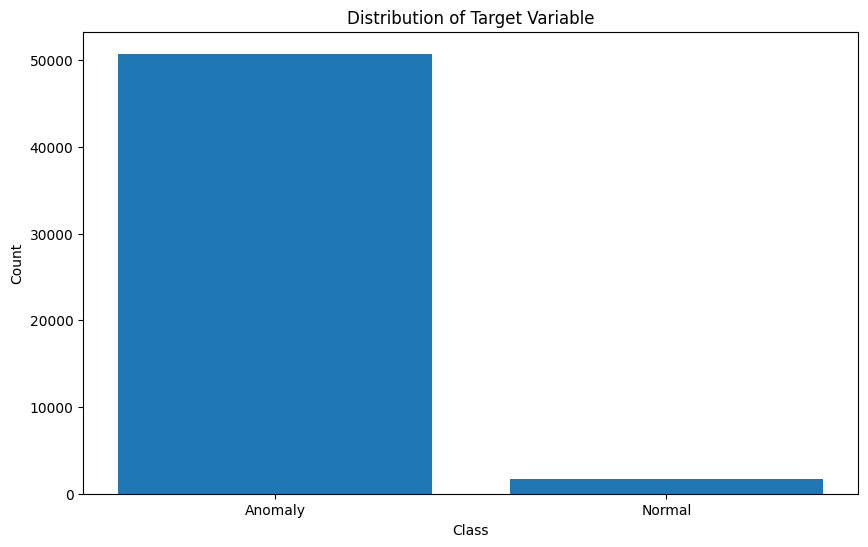


Percentage distribution of target variable:
Label
Anomaly    96.759806
Normal      3.240194
Name: count, dtype: float64


In [9]:
# Cell 5: Distribution of target variable
plt.figure(figsize=(10, 6))
target_dist = df['Label'].value_counts()  # Replace 'label' with your target column name
plt.bar(target_dist.index, target_dist.values)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("\nPercentage distribution of target variable:")
print((df['Label'].value_counts() / len(df)) * 100)

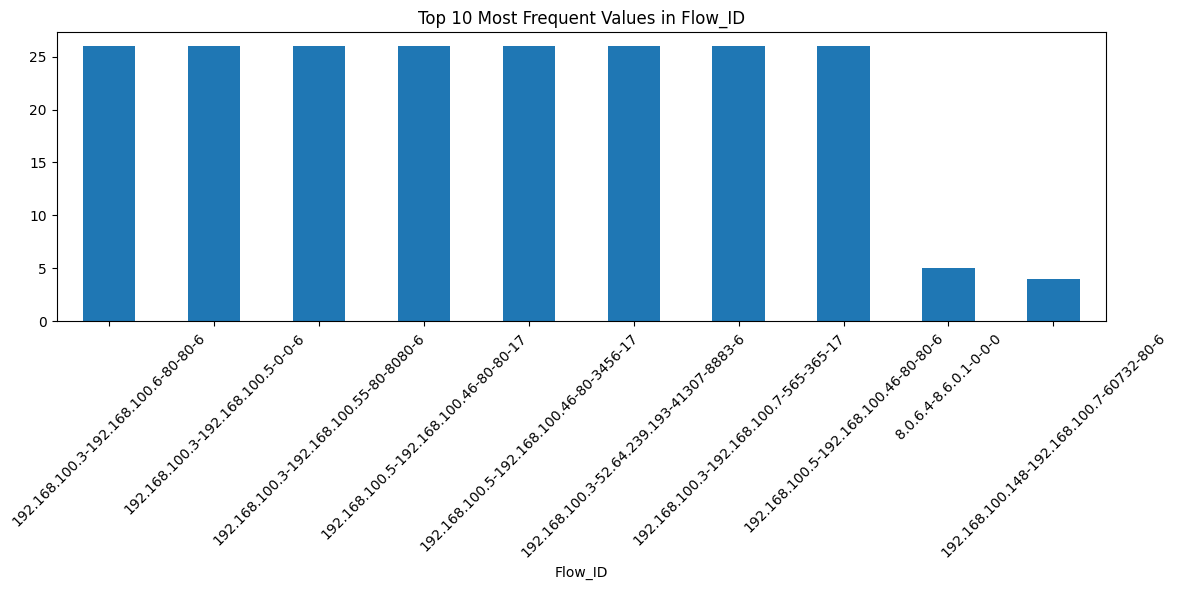

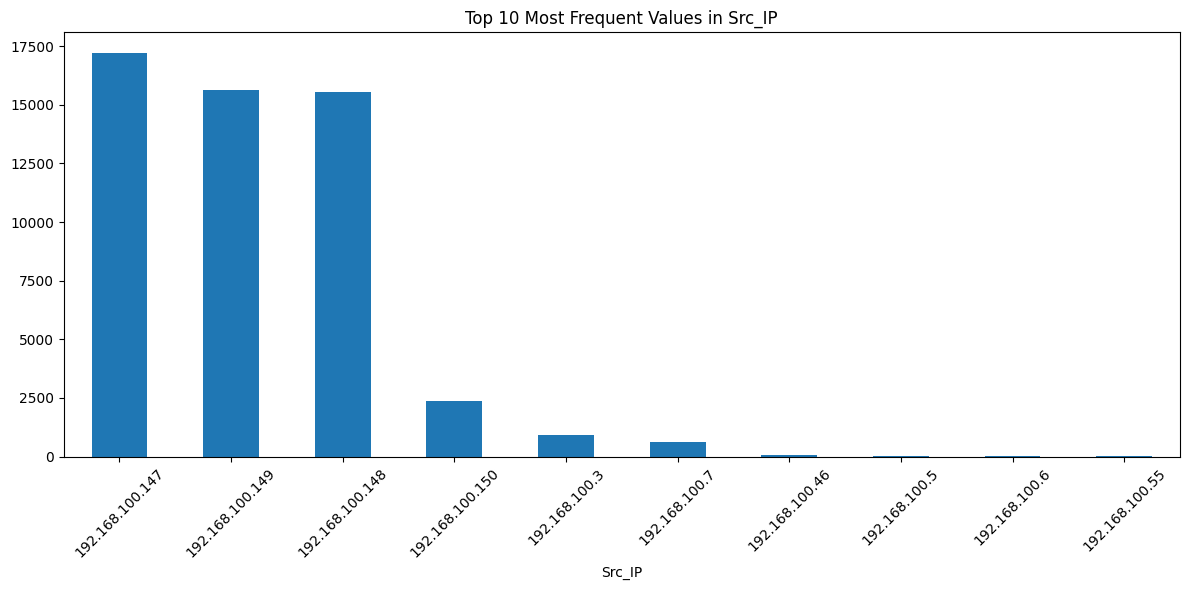

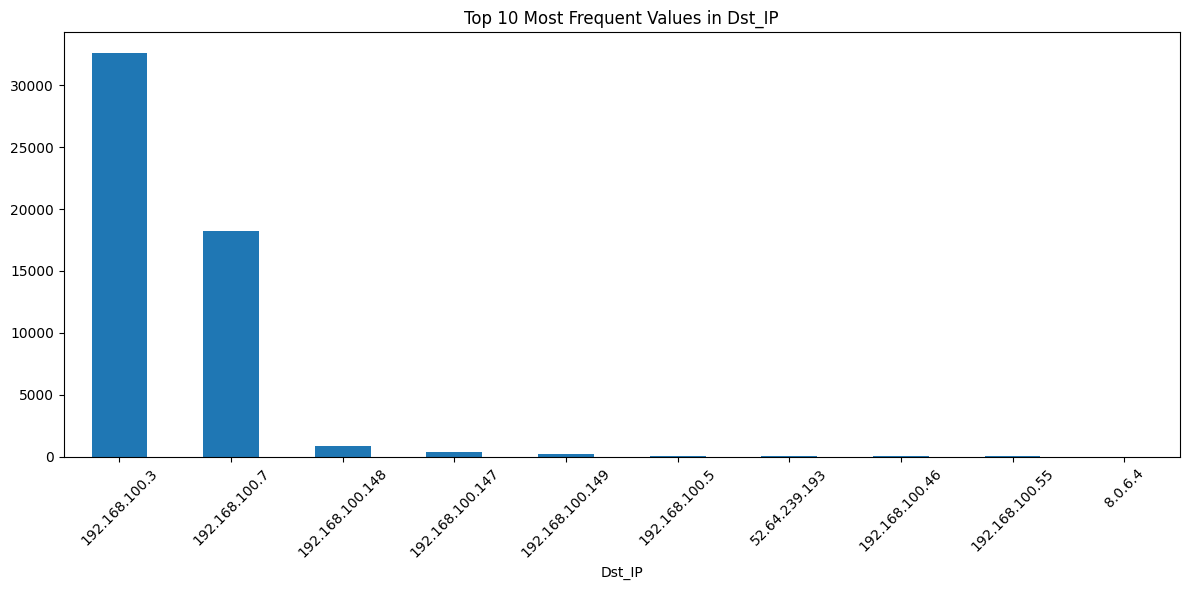

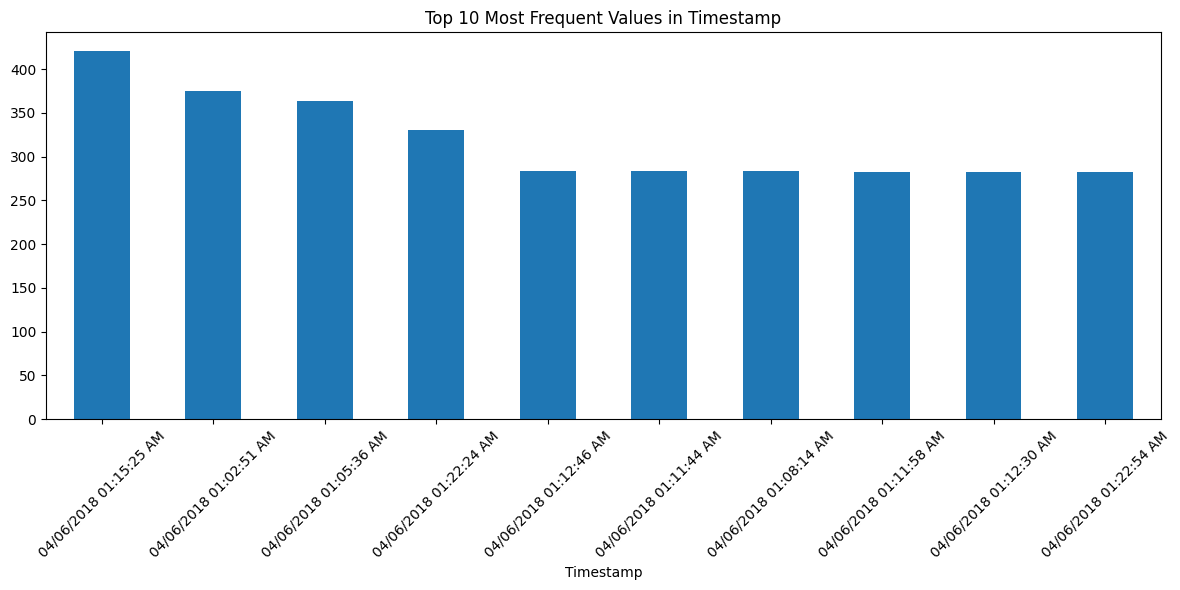

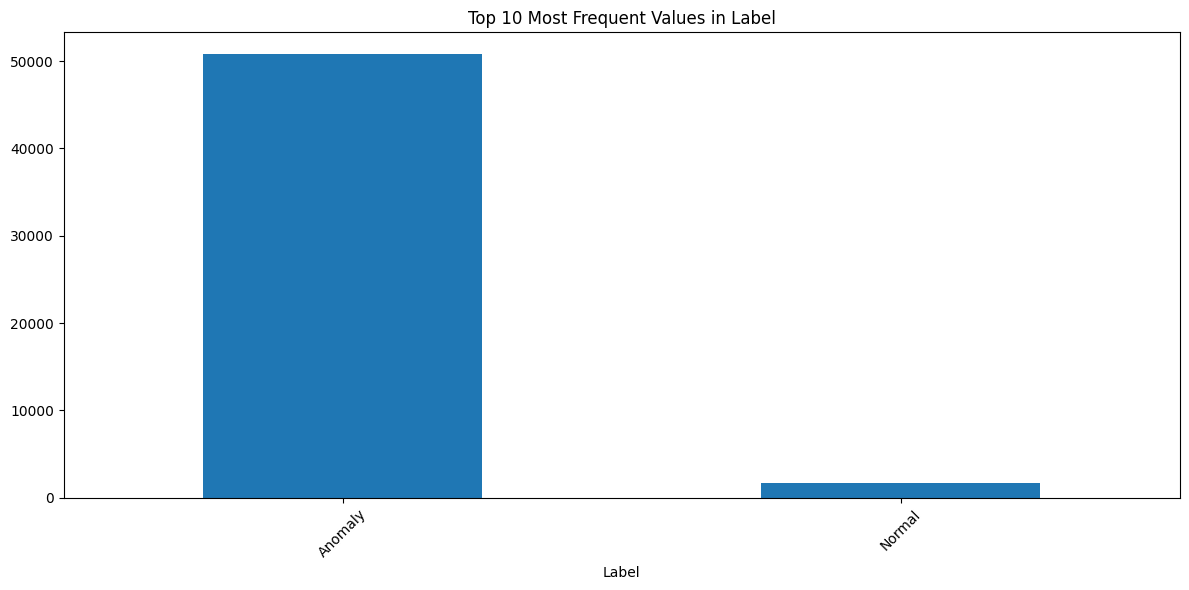

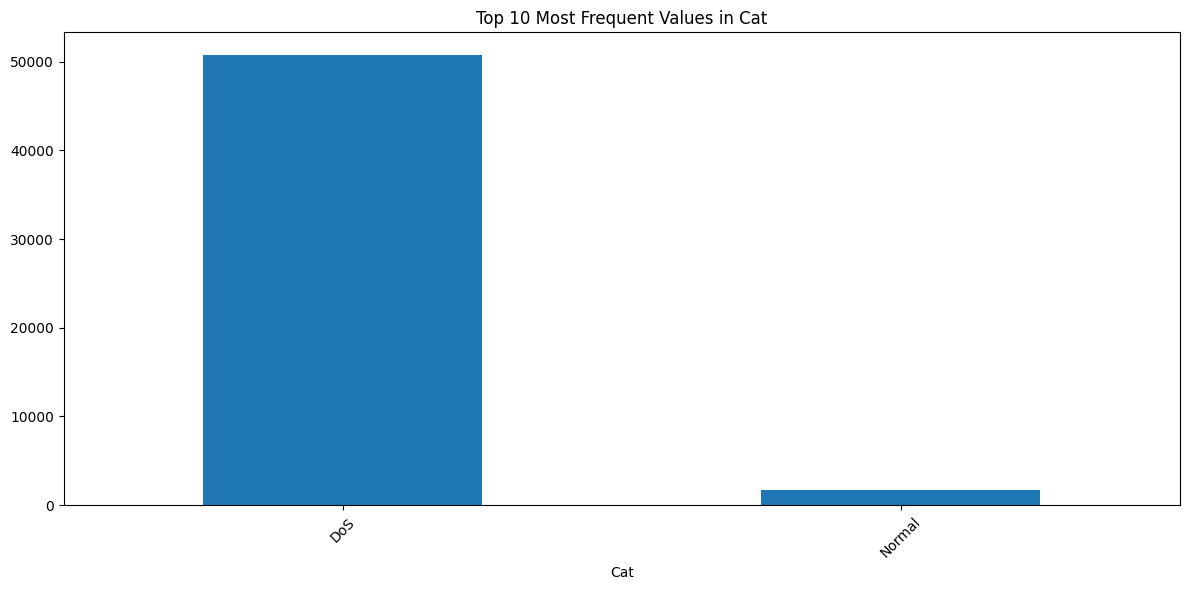

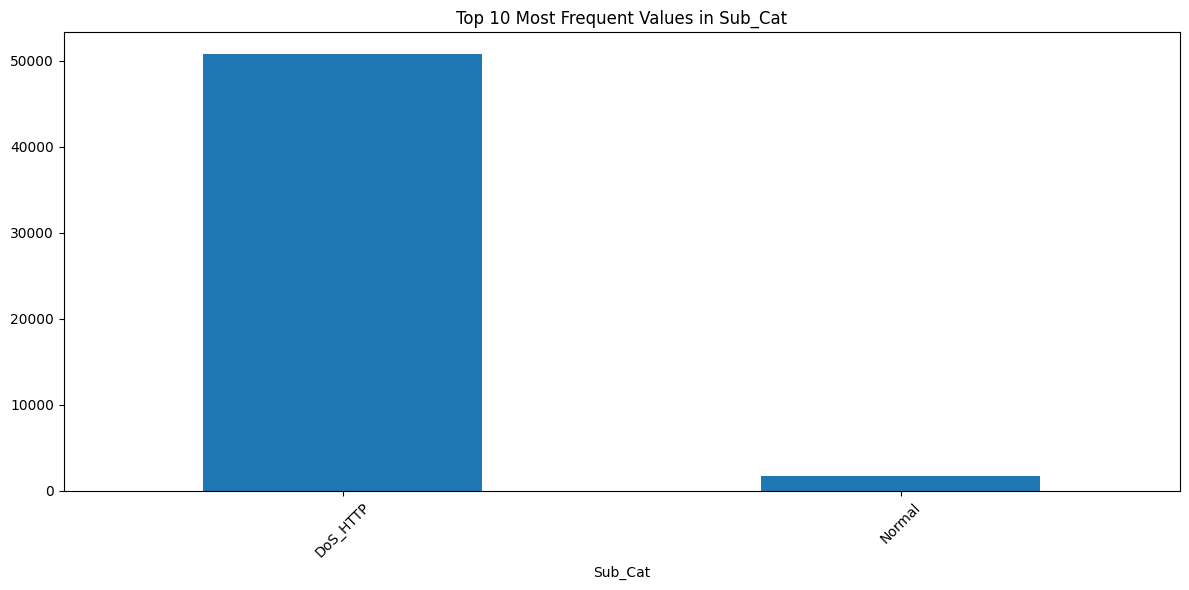

In [10]:
# Kategorik kolonlar için bar grafikleri
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 Most Frequent Values in {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

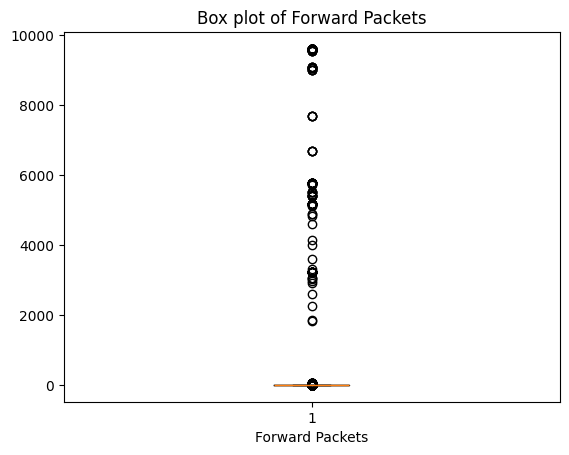

In [11]:
# Box plot of a numerical feature
plt.boxplot(df['Tot_Fwd_Pkts'])
plt.xlabel('Forward Packets')
plt.title('Box plot of Forward Packets')
plt.show()

In [12]:
#  Feature Engineering
def engineer_features(df):
    # Create copy to avoid modifying original dataframe
    df_engineered = df.copy()
    
    # Create new feature: Packet rate (packets per second)
    df_engineered['Packet_Rate'] = df_engineered['Tot_Fwd_Pkts'] / df_engineered['Flow_Duration']
    
    # Create new feature: Packet size distribution
    df_engineered['Packet_Size_Distribution'] = df_engineered['Tot_Fwd_Pkts'] / \
        (df_engineered['Tot_Fwd_Pkts'] + df_engineered['Tot_Bwd_Pkts'])
    
    # Create new feature: Protocol frequency
    protocol_counts = df_engineered['Protocol'].value_counts(normalize=True)
    df_engineered['Protocol_Frequency'] = df_engineered['Protocol'].map(protocol_counts)
    
    # Handle infinite values
    df_engineered = df_engineered.replace([np.inf, -np.inf], np.nan)
    df_engineered = df_engineered.fillna(0)
    
    return df_engineered

# Apply feature engineering
df_engineered = engineer_features(df)
print("Shape after feature engineering:", df_engineered.shape)
print("\nNew features preview:")
print(df_engineered[['Packet_Rate', 'Packet_Size_Distribution', 'Protocol_Frequency']].head())

Shape after feature engineering: (52466, 89)

New features preview:
    Packet_Rate  Packet_Size_Distribution  Protocol_Frequency
0  5.995506e-07                     0.375            0.997846
1  5.994947e-07                     0.375            0.997846
2  5.995809e-07                     0.375            0.997846
3  5.996144e-07                     0.375            0.997846
4  5.996432e-07                     0.375            0.997846


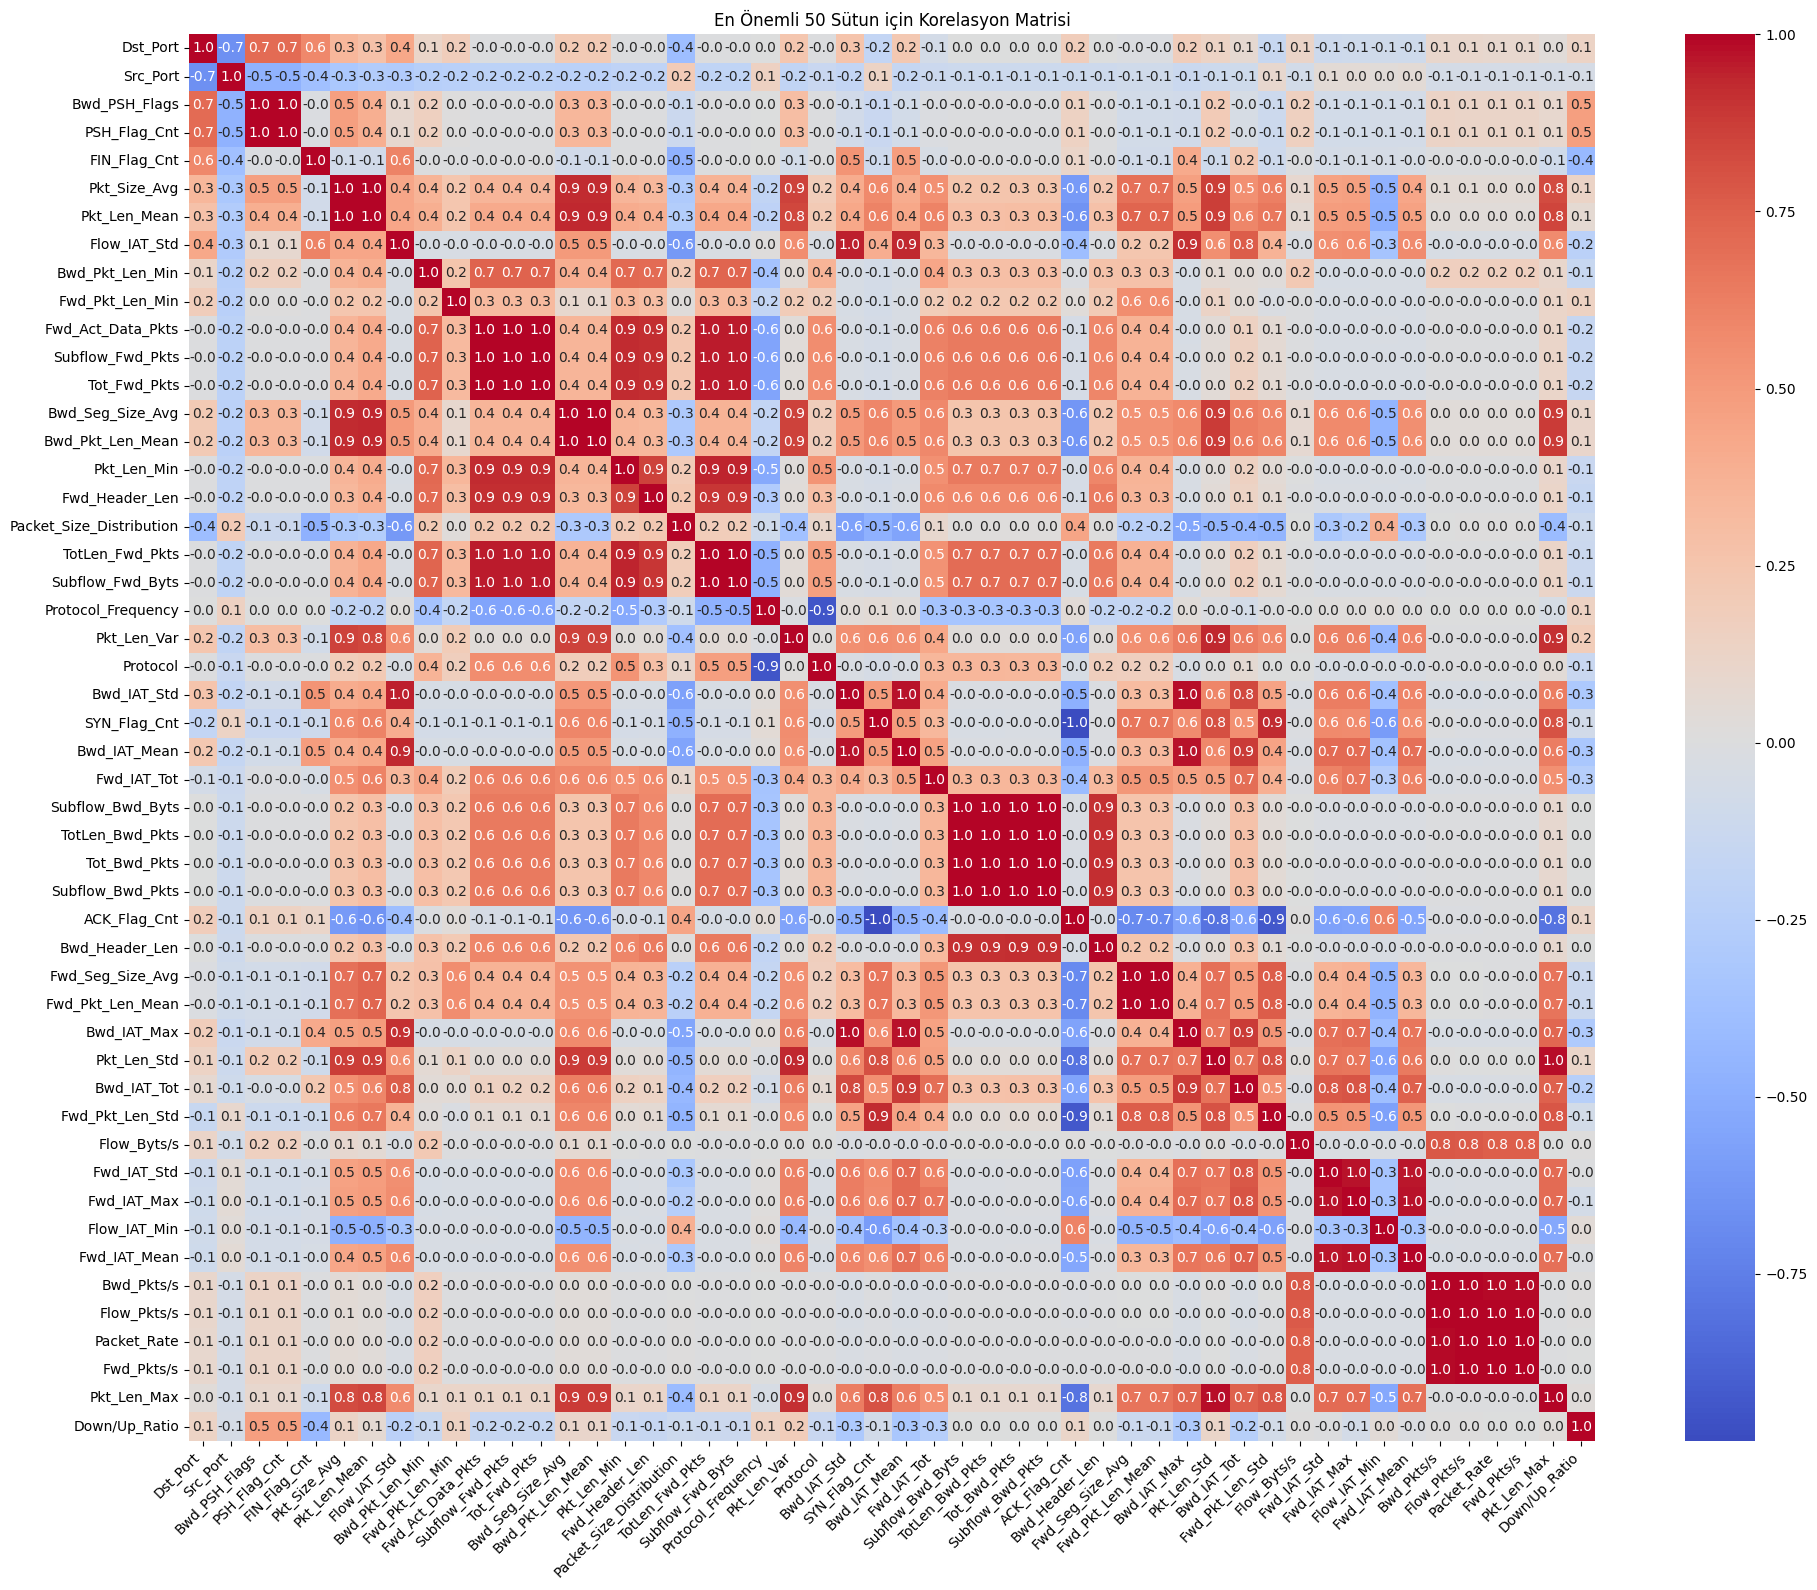

In [22]:

numerical_columns = df_engineered.select_dtypes(include=['int64', 'float64','int32']).columns

target_column = 'Label'

df_engineered[target_column] = LabelEncoder().fit_transform(df_engineered[target_column])

# Korelasyon matrisini oluşturun
corr_matrix = df_engineered[numerical_columns].corr()

# Hedef sütun ile diğer sütunlar arasındaki korelasyonları alın
target_corr = corr_matrix[target_column].drop(target_column)

# En önemli 50 sütunu seçin (en yüksek korelasyon değerlerine göre sıralayın)
top_50_features = target_corr.abs().sort_values(ascending=False).head(50).index

# En önemli 50 sütun için korelasyon matrisini alın
top_50_corr_matrix = corr_matrix.loc[top_50_features, top_50_features]

# Heatmap Görselleştirme
plt.figure(figsize=(20, 16))
sns.heatmap(
    top_50_corr_matrix, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True
)
plt.title("En Önemli 50 Sütun için Korelasyon Matrisi")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [23]:
print(top_50_features)

Index(['Dst_Port', 'Src_Port', 'Bwd_PSH_Flags', 'PSH_Flag_Cnt', 'FIN_Flag_Cnt',
       'Pkt_Size_Avg', 'Pkt_Len_Mean', 'Flow_IAT_Std', 'Bwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Min', 'Fwd_Act_Data_Pkts', 'Subflow_Fwd_Pkts',
       'Tot_Fwd_Pkts', 'Bwd_Seg_Size_Avg', 'Bwd_Pkt_Len_Mean', 'Pkt_Len_Min',
       'Fwd_Header_Len', 'Packet_Size_Distribution', 'TotLen_Fwd_Pkts',
       'Subflow_Fwd_Byts', 'Protocol_Frequency', 'Pkt_Len_Var', 'Protocol',
       'Bwd_IAT_Std', 'SYN_Flag_Cnt', 'Bwd_IAT_Mean', 'Fwd_IAT_Tot',
       'Subflow_Bwd_Byts', 'TotLen_Bwd_Pkts', 'Tot_Bwd_Pkts',
       'Subflow_Bwd_Pkts', 'ACK_Flag_Cnt', 'Bwd_Header_Len',
       'Fwd_Seg_Size_Avg', 'Fwd_Pkt_Len_Mean', 'Bwd_IAT_Max', 'Pkt_Len_Std',
       'Bwd_IAT_Tot', 'Fwd_Pkt_Len_Std', 'Flow_Byts/s', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Mean', 'Bwd_Pkts/s',
       'Flow_Pkts/s', 'Packet_Rate', 'Fwd_Pkts/s', 'Pkt_Len_Max',
       'Down/Up_Ratio'],
      dtype='object')


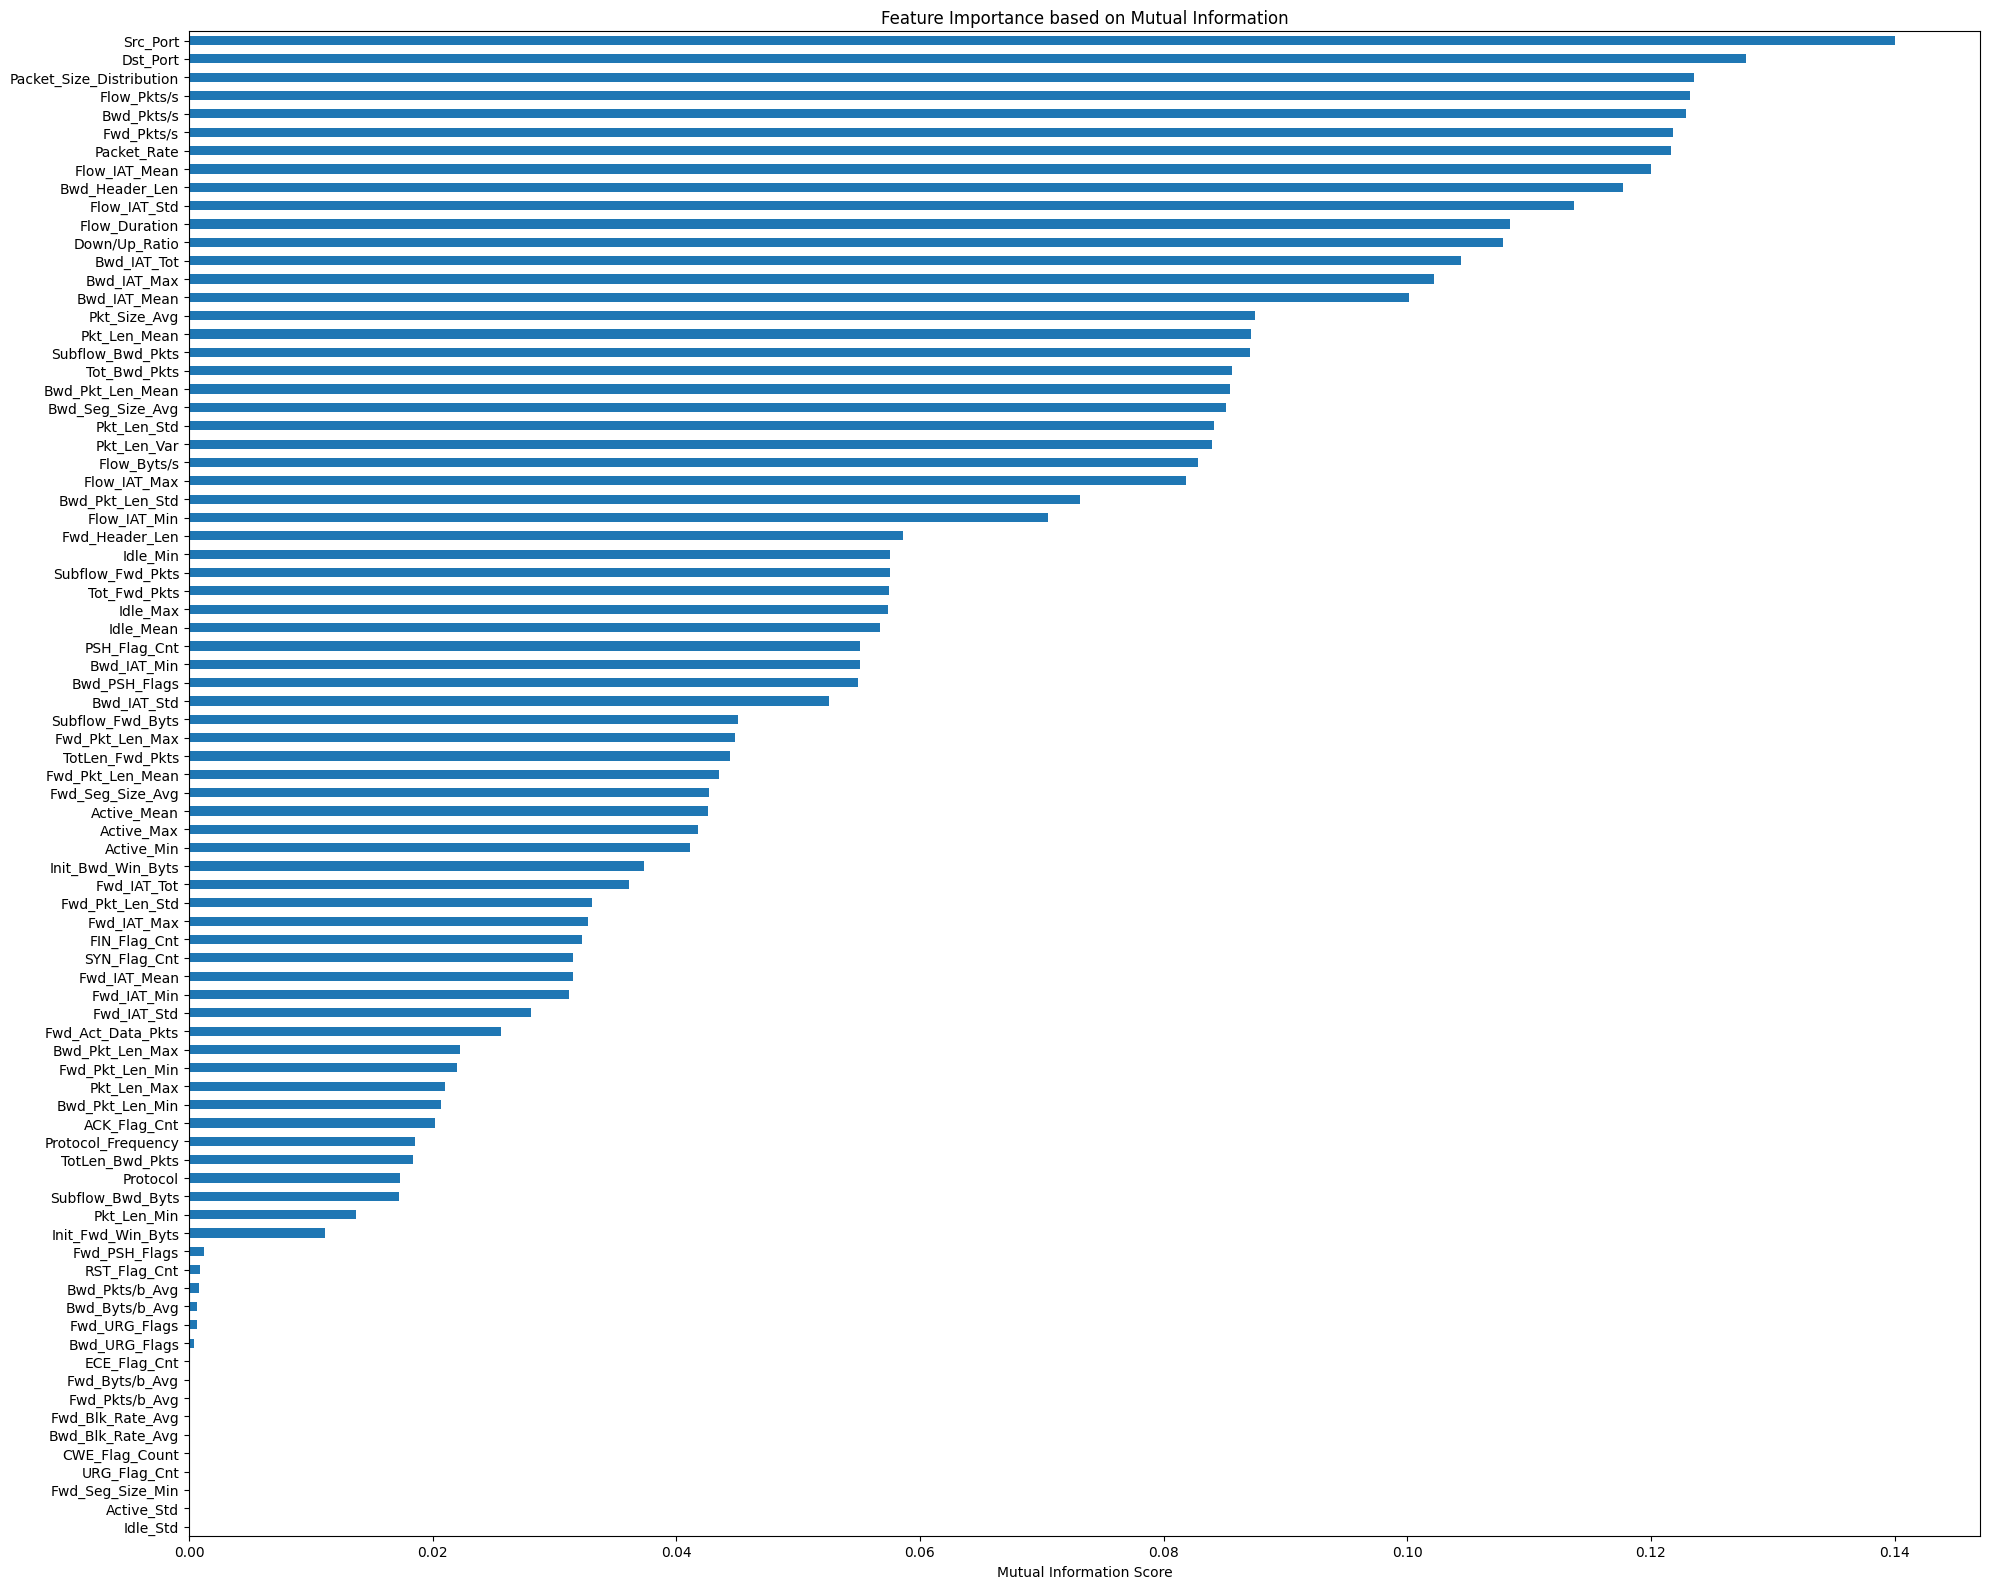


Top 50 selected features and their mutual information scores:
Src_Port                    0.140007
Dst_Port                    0.127821
Packet_Size_Distribution    0.123508
Flow_Pkts/s                 0.123190
Bwd_Pkts/s                  0.122850
Fwd_Pkts/s                  0.121808
Packet_Rate                 0.121606
Flow_IAT_Mean               0.119983
Bwd_Header_Len              0.117722
Flow_IAT_Std                0.113657
Flow_Duration               0.108470
Down/Up_Ratio               0.107883
Bwd_IAT_Tot                 0.104402
Bwd_IAT_Max                 0.102173
Bwd_IAT_Mean                0.100149
Pkt_Size_Avg                0.087516
Pkt_Len_Mean                0.087177
Subflow_Bwd_Pkts            0.087095
Tot_Bwd_Pkts                0.085644
Bwd_Pkt_Len_Mean            0.085445
Bwd_Seg_Size_Avg            0.085137
Pkt_Len_Std                 0.084166
Pkt_Len_Var                 0.084009
Flow_Byts/s                 0.082829
Flow_IAT_Max                0.081823
Bwd_Pkt_Len_

In [20]:
# Cell 6: Feature Selection using Mutual Information
def mutual_info_selection(X, y, k=10):
    # Calculate mutual information scores
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, index=X.columns)
    
    # Plot feature importance
    plt.figure(figsize=(20, 16))
    mi_scores.sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature Importance based on Mutual Information')
    plt.xlabel('Mutual Information Score')
    plt.tight_layout()
    plt.show()
    
    # Select top k features
    selected_features = mi_scores.nlargest(k).index
    return X[selected_features], selected_features, mi_scores

# Prepare data for feature selection
# Drop non-numeric columns and target variable
X = df_engineered.select_dtypes(include=[np.number])
y = df_engineered['Label']  # Replace 'label' with your target column name

# Apply feature selection
X_selected, selected_features, mi_scores = mutual_info_selection(X, y, k=50)

print("\nTop 50 selected features and their mutual information scores:")
print(mi_scores[selected_features].sort_values(ascending=False))

In [24]:
print(X_selected.head())


   Src_Port  Dst_Port  Packet_Size_Distribution  Flow_Pkts/s  Bwd_Pkts/s  \
0     51370        80                     0.375     1.598802    0.999251   
1     51368        80                     0.375     1.598653    0.999158   
2     51372        80                     0.375     1.598882    0.999301   
3     51374        80                     0.375     1.598972    0.999357   
4     51376        80                     0.375     1.599049    0.999405   

   Fwd_Pkts/s   Packet_Rate  Flow_IAT_Mean  Bwd_Header_Len  Flow_IAT_Std  ...  \
0    0.599551  5.995506e-07  714821.142857             176  1.890821e+06  ...   
1    0.599495  5.994947e-07  714887.714286             176  1.890988e+06  ...   
2    0.599581  5.995809e-07  714785.000000             176  1.890694e+06  ...   
3    0.599614  5.996144e-07  714745.000000             176  1.890626e+06  ...   
4    0.599643  5.996432e-07  714710.714286             176  1.890503e+06  ...   

   Fwd_Pkt_Len_Mean  Fwd_Seg_Size_Avg  Active_Mean  Acti

In [25]:
print(selected_features)

Index(['Src_Port', 'Dst_Port', 'Packet_Size_Distribution', 'Flow_Pkts/s',
       'Bwd_Pkts/s', 'Fwd_Pkts/s', 'Packet_Rate', 'Flow_IAT_Mean',
       'Bwd_Header_Len', 'Flow_IAT_Std', 'Flow_Duration', 'Down/Up_Ratio',
       'Bwd_IAT_Tot', 'Bwd_IAT_Max', 'Bwd_IAT_Mean', 'Pkt_Size_Avg',
       'Pkt_Len_Mean', 'Subflow_Bwd_Pkts', 'Tot_Bwd_Pkts', 'Bwd_Pkt_Len_Mean',
       'Bwd_Seg_Size_Avg', 'Pkt_Len_Std', 'Pkt_Len_Var', 'Flow_Byts/s',
       'Flow_IAT_Max', 'Bwd_Pkt_Len_Std', 'Flow_IAT_Min', 'Fwd_Header_Len',
       'Idle_Min', 'Subflow_Fwd_Pkts', 'Tot_Fwd_Pkts', 'Idle_Max', 'Idle_Mean',
       'PSH_Flag_Cnt', 'Bwd_IAT_Min', 'Bwd_PSH_Flags', 'Bwd_IAT_Std',
       'Subflow_Fwd_Byts', 'Fwd_Pkt_Len_Max', 'TotLen_Fwd_Pkts',
       'Fwd_Pkt_Len_Mean', 'Fwd_Seg_Size_Avg', 'Active_Mean', 'Active_Max',
       'Active_Min', 'Init_Bwd_Win_Byts', 'Fwd_IAT_Tot', 'Fwd_Pkt_Len_Std',
       'Fwd_IAT_Max', 'FIN_Flag_Cnt'],
      dtype='object')


In [26]:
#differences between selected features and top 50 features
print(set(selected_features) - set(top_50_features))
print(set(top_50_features) - set(selected_features))


{'Flow_IAT_Max', 'Flow_IAT_Mean', 'Bwd_IAT_Min', 'Fwd_Pkt_Len_Max', 'Active_Min', 'Active_Max', 'Idle_Max', 'Init_Bwd_Win_Byts', 'Flow_Duration', 'Active_Mean', 'Idle_Mean', 'Idle_Min', 'Bwd_Pkt_Len_Std'}
{'Pkt_Len_Min', 'Fwd_IAT_Std', 'Bwd_Pkt_Len_Min', 'Fwd_Act_Data_Pkts', 'SYN_Flag_Cnt', 'Subflow_Bwd_Byts', 'Protocol_Frequency', 'Fwd_Pkt_Len_Min', 'TotLen_Bwd_Pkts', 'Pkt_Len_Max', 'Protocol', 'ACK_Flag_Cnt', 'Fwd_IAT_Mean'}


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_and_save_data(df, selected_features, output_file='processed_features.csv'):
    """Preprocess data and save to CSV without splitting"""
    try:
        # Select features
        X = df[selected_features]
        y = df['Label']
        
        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        
        # Add label column
        X_scaled['Label'] = y
        
        # Save to CSV
        X_scaled.to_csv(output_file, index=False)
        print(f"Preprocessed data saved to '{output_file}'")
        print(f"Total samples: {len(X_scaled)}")
        print(f"Features: {X_scaled.columns.tolist()}")
        
    except Exception as e:
        print(f"Error in preprocessing/saving: {str(e)}")
        raise

# Example usage
preprocess_and_save_data(df_engineered, selected_features)

Preprocessed data saved to 'processed_features.csv'
Total samples: 52466
Features: ['Src_Port', 'Dst_Port', 'Packet_Size_Distribution', 'Flow_Pkts/s', 'Bwd_Pkts/s', 'Fwd_Pkts/s', 'Packet_Rate', 'Flow_IAT_Mean', 'Bwd_Header_Len', 'Flow_IAT_Std', 'Flow_Duration', 'Down/Up_Ratio', 'Bwd_IAT_Tot', 'Bwd_IAT_Max', 'Bwd_IAT_Mean', 'Pkt_Size_Avg', 'Pkt_Len_Mean', 'Subflow_Bwd_Pkts', 'Tot_Bwd_Pkts', 'Bwd_Pkt_Len_Mean', 'Bwd_Seg_Size_Avg', 'Pkt_Len_Std', 'Pkt_Len_Var', 'Flow_Byts/s', 'Flow_IAT_Max', 'Bwd_Pkt_Len_Std', 'Flow_IAT_Min', 'Fwd_Header_Len', 'Idle_Min', 'Subflow_Fwd_Pkts', 'Tot_Fwd_Pkts', 'Idle_Max', 'Idle_Mean', 'PSH_Flag_Cnt', 'Bwd_IAT_Min', 'Bwd_PSH_Flags', 'Bwd_IAT_Std', 'Subflow_Fwd_Byts', 'Fwd_Pkt_Len_Max', 'TotLen_Fwd_Pkts', 'Fwd_Pkt_Len_Mean', 'Fwd_Seg_Size_Avg', 'Active_Mean', 'Active_Max', 'Active_Min', 'Init_Bwd_Win_Byts', 'Fwd_IAT_Tot', 'Fwd_Pkt_Len_Std', 'Fwd_IAT_Max', 'FIN_Flag_Cnt', 'Label']
